In [17]:
import numpy as np
import pandas as pd

dtype = {
    "approxdate": str
}

data = pd.read_csv("globalterrorismdb_0617dist.csv",
                  encoding="ISO-8859-1", low_memory=False)
pd.options.display.max_rows = 8

data

eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
170346  201612310042   2016      12    31        NaN         0        NaN   
170347  201612310043   2016      12    31        NaN         1        NaN   
170348  201612310044   2016      12    31        NaN         0        NaN   
170349  201701270001   2016      12    30        NaN         0        NaN   

        country                       country_txt  region   ...     \
0            58                Dominican Republic       2   ...      
1           130                            Mexico       1   ...      
2           160                       Philippines       5   ...      
3            78                            Greece       8   ...      
...         ...                               ...     ...   ...      
170346      160                       Philippines       5   ...      
170347      229  Democratic Republic of the Congo      11   ...      
170348      130                            Mexico       1   ...      
170349      195                             Sudan      11   ...      

                                                 addnotes  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
...                                                   ...   
170346                                                NaN   
170347                                                NaN   
170348  There is doubt that this incident meets terror...   
170349  There is doubt that this incident meets terror...   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
...                                                   ...   
170346  "AFP braces for more BIFF attacks in ARMM," Ma...   
170347  "DRC Armed Forces Dislodge Ugandan LRA Rebels ...   
170348  "Gunmen shoot at home of Mexican indigenous ri...   
170349  "Rebels To Blame For Nierteti Killing: Central...   

                                                   scite2  scite3  \
0                                                     NaN     NaN   
1                                                     NaN     NaN   
2                                                     NaN     NaN   
3                                                     NaN     NaN   
...                                                   ...     ...   
170346  "Asia: US Army ASD Philippine Terrorist Media ...     NaN   
170347                                                NaN     NaN   
170348  " Gunmen shoot at home of Mexican indigenous ...     NaN   
170349  "Security deteriorates in West Darfur alongsid...     NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      NaN  
1                           PGIS        0         1        1       1      NaN  
2                           PGIS       -9        -9        1       1      NaN  
3                           PGIS       -9        -9        1       1      NaN  
...                          ...      ...       ...      ...     ...      ...  
170346  START Primary Collection       -9        -9        0      -9      NaN  
170347  START Primary Collection        1         1        0       1

In [3]:
groupped_by_year = data.groupby("iyear")
len(groupped_by_year)

46

In [4]:
groupped_by_year.size()

iyear
1970      651
1971      470
1972      496
1973      473
        ...  
2013    11996
2014    16860
2015    14852
2016    13488
Length: 46, dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
years = data[['iyear']]
len(years)

170350

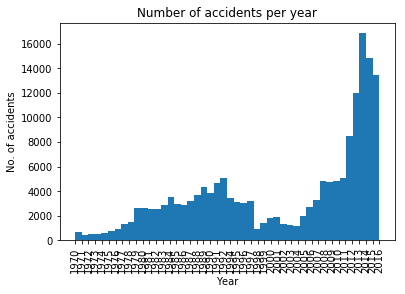

In [7]:
# 1. Plot the number of terrorist accidents each year.

bins_no = len(years.drop_duplicates())
bins_no
plt.hist(years, bins=bins_no)
plt.title("Number of accidents per year")
plt.xlabel("Year")
plt.ylabel("No. of accidents")
#plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=90)
plt.show()

In [8]:
# 2. Make the same plot but split between Americas, Asia, Europe and Africa. Use the stacked bar plot.

groupped_by_region = data.groupby("region")
len(groupped_by_region)

12

In [9]:
years_with_region = data[['iyear', 'region_txt']]

In [10]:
df2 = years_with_region.groupby('iyear')
cdf = dict(list(df2))
#print(list(dict(cdf[1970])['region_txt']))
all_regions_in_year = list(cdf[1970]['region_txt'])
print(all_regions_in_year)


#list(cdf[1970]['region_txt'].drop_duplicates())


#prepared_data = dict()

#def collect_data(group):
#    print(group['iyear'])
    
#df2.apply(collect_data)

#years = data[['iyear']].drop_duplicates()
#years.set_index('iyear', inplace=True)

['Central America & Caribbean', 'North America', 'Southeast Asia', 'Western Europe', 'East Asia', 'North America', 'South America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Western Europe', 'North America', 'North America', 'Eastern Europe', 'Sub-Saharan Africa', 'North America', 'North America', 'North America', 'North America', 'South America', 'North America', 'North America', 'North America', 'Central America & Caribbean', 'Southeast Asia', 'South America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Eastern Europe', 'North America', 'North America', 'North America', 'North America', 'Southeast Asia', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'North Amer

In [11]:
from collections import defaultdict

new_data = dict()
for year, data in cdf.items():
    regions = list(cdf[year]['region_txt'])
    new_data[year] = defaultdict(lambda: 0)
    for region in regions:
        new_data[year][region] += 1
        
print(new_data)

{1970: defaultdict(<function <lambda> at 0x10841f730>, {'South Asia': 1, 'Middle East & North Africa': 29, 'Eastern Europe': 12, 'East Asia': 2, 'Australasia & Oceania': 1, 'South America': 65, 'Sub-Saharan Africa': 3, 'Western Europe': 49, 'North America': 472, 'Central America & Caribbean': 7, 'Southeast Asia': 10}), 1971: defaultdict(<function <lambda> at 0x10841f840>, {'Middle East & North Africa': 55, 'Eastern Europe': 4, 'Sub-Saharan Africa': 2, 'Australasia & Oceania': 1, 'South America': 24, 'East Asia': 1, 'Western Europe': 125, 'North America': 247, 'Central America & Caribbean': 5, 'Southeast Asia': 6}), 1972: defaultdict(<function <lambda> at 0x10841f8c8>, {'South Asia': 1, 'Middle East & North Africa': 35, 'Eastern Europe': 1, 'Australasia & Oceania': 2, 'South America': 20, 'Western Europe': 355, 'Southeast Asia': 10, 'Central America & Caribbean': 3, 'North America': 69}), 1973: defaultdict(<function <lambda> at 0x10841f950>, {'South Asia': 1, 'Middle East & North Africa

In [12]:
all_regions = data['region_txt'].drop_duplicates()
sorted_region_names = sorted(list(all_regions))
print(sorted_region_names)

prepared_data = list()

for year, data in new_data.items():
    row = list()
    for region in sorted_region_names:
        row.append(data[region])
    prepared_data.append(row)
    
#     regions = sorted(data.keys())
#     ordered = list()
#     for r in regions:
#         ordered.append(data[r])
#     prepared_data.append(ordered)
# print(prepared_data)

['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']


In [13]:
dict(df2['region_txt'].value_counts())

{(1970, 'Australasia & Oceania'): 1,
 (1970, 'Central America & Caribbean'): 7,
 (1970, 'East Asia'): 2,
 (1970, 'Eastern Europe'): 12,
 (1970, 'Middle East & North Africa'): 29,
 (1970, 'North America'): 472,
 (1970, 'South America'): 65,
 (1970, 'South Asia'): 1,
 (1970, 'Southeast Asia'): 10,
 (1970, 'Sub-Saharan Africa'): 3,
 (1970, 'Western Europe'): 49,
 (1971, 'Australasia & Oceania'): 1,
 (1971, 'Central America & Caribbean'): 5,
 (1971, 'East Asia'): 1,
 (1971, 'Eastern Europe'): 4,
 (1971, 'Middle East & North Africa'): 55,
 (1971, 'North America'): 247,
 (1971, 'South America'): 24,
 (1971, 'Southeast Asia'): 6,
 (1971, 'Sub-Saharan Africa'): 2,
 (1971, 'Western Europe'): 125,
 (1972, 'Australasia & Oceania'): 2,
 (1972, 'Central America & Caribbean'): 3,
 (1972, 'Eastern Europe'): 1,
 (1972, 'Middle East & North Africa'): 35,
 (1972, 'North America'): 69,
 (1972, 'South America'): 20,
 (1972, 'South Asia'): 1,
 (1972, 'Southeast Asia'): 10,
 (1972, 'Western Europe'): 355,
 

In [29]:
all_years = list(data['iyear'].drop_duplicates())
all_regions = data['region_txt'].drop_duplicates()
sorted_region_names = sorted(list(all_regions))
transformed_data = dict(df2['region_txt'].value_counts())

# print(transformed_data.get((1970, 'East Asiaz'), 'xd'))

prepared_data = list()

for region in sorted_region_names:
    row = list()
    for year in all_years:
        row.append(transformed_data.get((year, region), 0))
    prepared_data.append((region, row))  

print(prepared_data)

[('Australasia & Oceania', [1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 7, 3, 4, 2, 0, 11, 7, 3, 12, 29, 18, 10, 17, 14, 18, 19, 7, 6, 4, 6, 4, 2, 4, 0, 0, 2, 1, 8, 1, 1, 0, 0, 1, 9, 14, 10]), ('Central America & Caribbean', [7, 5, 3, 6, 11, 9, 45, 24, 199, 609, 1070, 1148, 393, 996, 858, 681, 780, 566, 495, 503, 316, 729, 212, 180, 168, 116, 117, 1, 8, 14, 8, 3, 8, 5, 3, 5, 4, 0, 9, 1, 1, 1, 14, 5, 1, 3]), ('Central Asia', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 77, 65, 55, 33, 49, 25, 24, 21, 18, 6, 7, 8, 11, 6, 4, 36, 31, 9, 9, 12, 7, 9, 9, 16]), ('East Asia', [2, 1, 0, 2, 4, 12, 2, 4, 35, 16, 1, 4, 12, 3, 13, 15, 10, 10, 24, 18, 99, 29, 74, 34, 38, 89, 40, 9, 4, 19, 20, 4, 6, 4, 2, 1, 0, 25, 8, 1, 4, 4, 14, 42, 28, 8]), ('Eastern Europe', [12, 4, 1, 1, 2, 0, 0, 2, 2, 1, 1, 4, 3, 3, 2, 4, 5, 1, 4, 16, 58, 84, 91, 95, 68, 175, 248, 105, 138, 234, 252, 112, 100, 45, 75, 70, 62, 209, 165, 260, 198, 173, 165, 965, 684, 132]), ('Middle East & North Africa', [29, 55, 35, 19, 

In [30]:
ind = np.arange(len(all_years))

legend = {
    "plots": list(),
    "names": list()
}

####
ppd = {
    "North America": [0 for x in range(46)],
    "South America": [0 for x in range(46)],
    "Europe": [0 for x in range(46)],
    "Asia": [0 for x in range(46)],
    "Africa": [0 for x in range(46)],
}

def fill_up_values(region, values):
    for i, value in enumerate(values):
        ppd[region][i] += value

for region, values in prepared_data:
    print(region)
    if region in ('Eastern Europe', "Western Europe"):
        fill_up_values("Europe", values)
    elif region in ("Middle East & North Africa", "Sub-Saharan Africa"):
        fill_up_values("Africa", values)
    elif region in ("North America", "Central America & Caribbean"):
        fill_up_values("North America", values)
    elif region == "South America":
        fill_up_values("South America", values)
    elif region in ("South Asia", "East Asia", "Central Asia", "Southeast Asia"):
        fill_up_values("Asia", values)

prepared_data = list(ppd.items())

prepared_data
        
####


p0 = plt.bar(ind, prepared_data[0][1])
legend["plots"].append(p0[0])
legend["names"].append(prepared_data[0][0])
previous = prepared_data[0][1]

for region, values in prepared_data[1:]:
    p = plt.bar(ind, values, bottom=previous)
    legend["plots"].append(p[0])
    legend["names"].append(region)
    previous = values

plt.ylabel("Incidents")
plt.title("Incidents in years per region")
plt.xticks(ind, tuple([str(x) for x in all_years]))
plt.xticks(rotation=90)
plt.legend(legend["plots"], legend["names"])

plt.show()

Australasia & Oceania
Central America & Caribbean
Central Asia
East Asia
Eastern Europe
Middle East & North Africa
North America
South America
South Asia
Southeast Asia
Sub-Saharan Africa
Western Europe
